In [7]:
# Climate Change Impact on Crop Yield - Full Analysis Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [8]:
# Data Cleaning and Preprocessing
df = pd.read_csv("Data1.csv", sep=";", skiprows=1)

def clean_to_float(val):
    try:
        val = str(val).replace(',', '.').replace('Oca', '1').replace('Mar', '3').replace('Ara', '12')
        return float(val)
    except:
        return None

cols_to_clean = [
    'Average_Temperature_C', 'CO2_Emissions_MT',
    'Crop_Yield_MT_per_HA', 'Irrigation_Access_%', 'Soil_Health_Index'
]
for col in cols_to_clean:
    df[col] = df[col].apply(clean_to_float)

df['Crop_Yield_MT_per_HA'] = df['Crop_Yield_MT_per_HA'].apply(clean_to_float)

df = df.dropna(subset=[
    'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
    'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events',
    'Irrigation_Access_%', 'Soil_Health_Index'
])


In [9]:
# Feature and Target Definition
X = df[[
    'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
    'Extreme_Weather_Events', 'Irrigation_Access_%', 'Soil_Health_Index']]
y = df['Crop_Yield_MT_per_HA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Machine Learning with Hyperparameter Tuning
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
dt_params = {'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
knn_params = {'n_neighbors': [3, 5, 7]}

models = {
    'Random Forest': (RandomForestRegressor(random_state=42), rf_params),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), dt_params),
    'KNN': (KNeighborsRegressor(), knn_params)
}

results = {}
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='r2')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    results[name] = {
        'model': grid.best_estimator_,
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Predictions': y_pred
    }


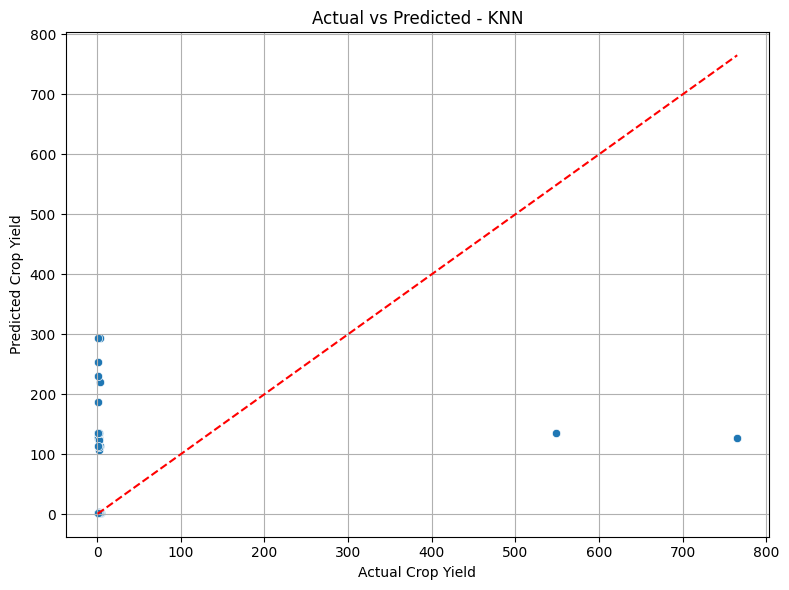

In [11]:
# Visualization - Regression
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_pred = results[best_model_name]['Predictions']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.grid(True)
plt.tight_layout()
plt.show()


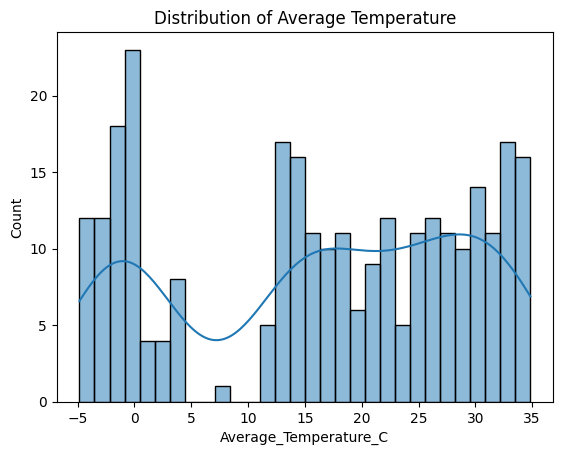

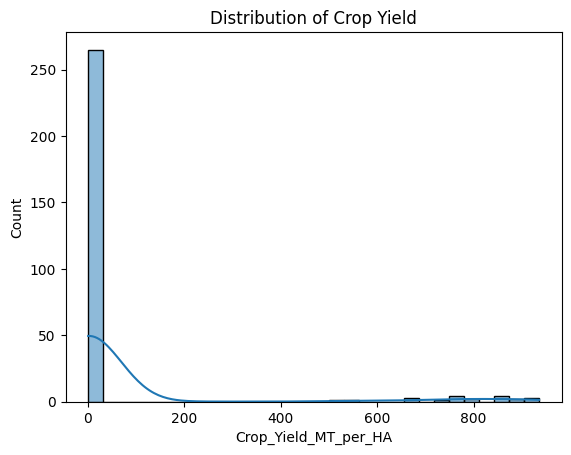

In [12]:
# Univariate Analysis
sns.histplot(df['Average_Temperature_C'], bins=30, kde=True)
plt.title("Distribution of Average Temperature")
plt.show()

sns.histplot(df['Crop_Yield_MT_per_HA'], bins=30, kde=True)
plt.title("Distribution of Crop Yield")
plt.show()


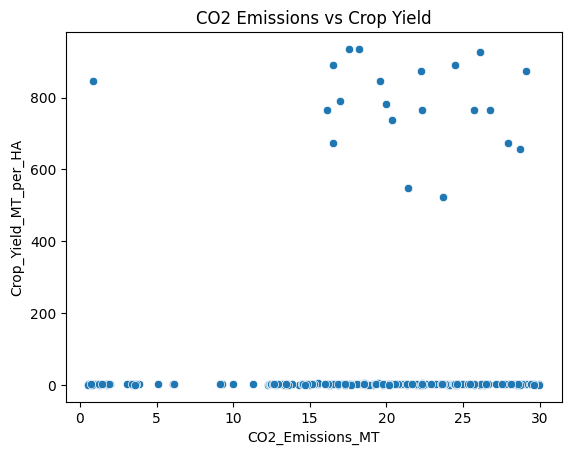

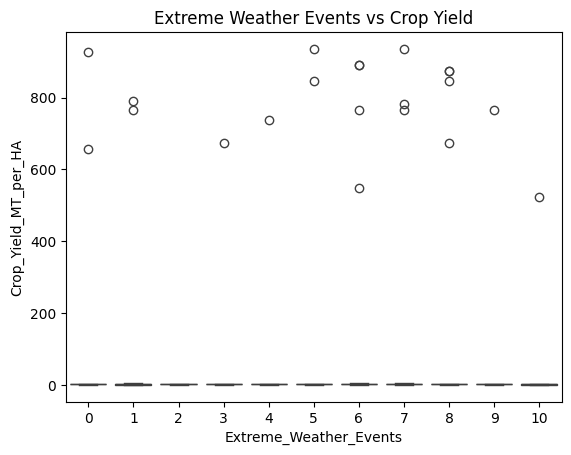

In [13]:
# Bivariate Analysis
sns.scatterplot(data=df, x="CO2_Emissions_MT", y="Crop_Yield_MT_per_HA")
plt.title("CO2 Emissions vs Crop Yield")
plt.show()

sns.boxplot(data=df, x="Extreme_Weather_Events", y="Crop_Yield_MT_per_HA")
plt.title("Extreme Weather Events vs Crop Yield")
plt.show()


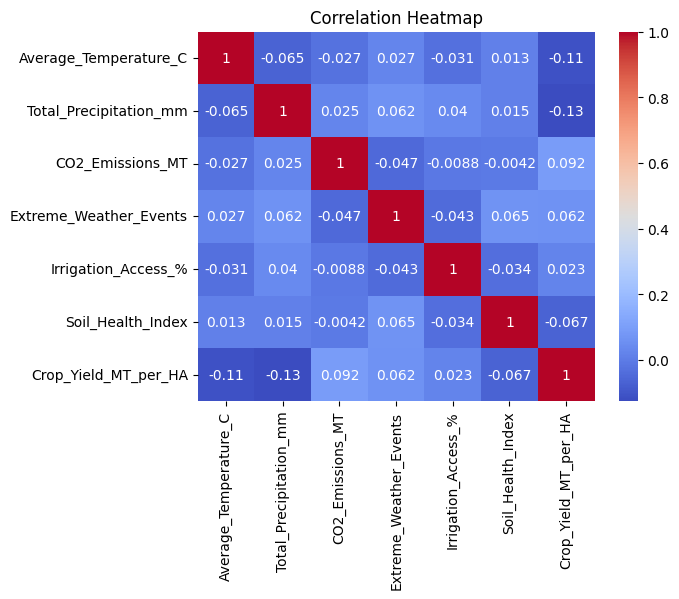

In [14]:
# Multivariate Analysis
sns.heatmap(X.join(y).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


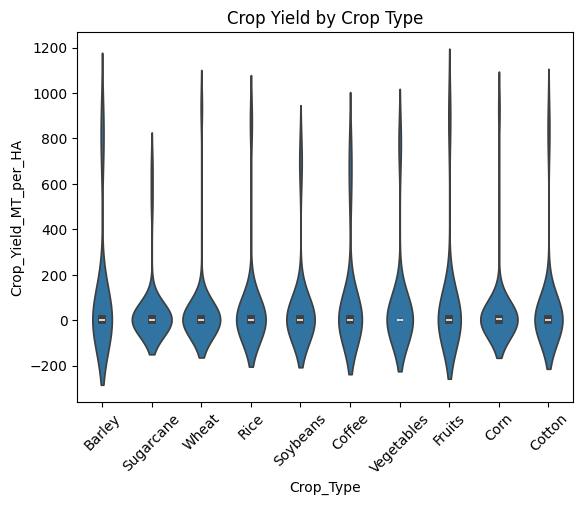

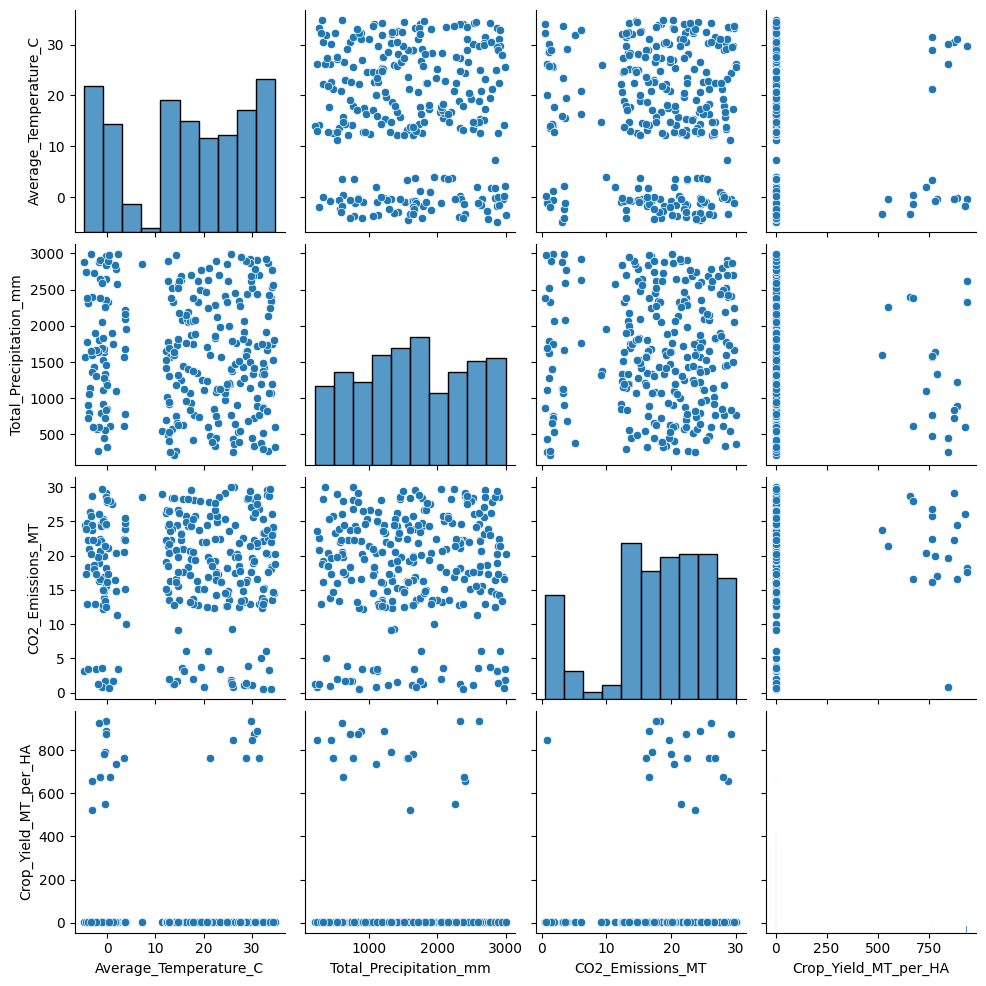

In [15]:
# Violin plot and Pairplot
sns.violinplot(data=df, x="Crop_Type", y="Crop_Yield_MT_per_HA")
plt.xticks(rotation=45)
plt.title("Crop Yield by Crop Type")
plt.show()

sns.pairplot(df[[
    'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA']])
plt.show()
